In [139]:
#Fake news detection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [140]:
#import training data
fake_df = pd.read_csv("train.csv",header=0,doublequote=True, engine=None)
len(fake_df)
fake_df

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated
...,...,...,...,...,...,...
256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated
256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated
256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated
256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated


In [141]:
fake_df['title2_en'].iloc[0]


'Police disprove "bird\'s nest congress each person gets 50,000 yuan" still old people insist on going to beijing'

In [142]:
#import test data
fake_test_df = pd.read_csv("test.csv",header=0,doublequote=True, engine=None)
len(fake_test_df)
fake_test_df

,id,tid1,tid2,title1_en,title2_en
0,256442,100672,100673,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,..."
1,256443,162269,162270,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh..."
2,256444,157826,157854,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this..."
3,256445,109579,74076,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...
4,256446,15068,15085,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...
...,...,...,...,...,...
64105,320547,94862,94863,The lead content of domestic faucet exceeds th...,"The multi-brand faucet is overtaxed, who is en..."
64106,320548,7451,7452,"In 2018, the household registration system has...","In 2018, the household registration system wil..."
64107,320549,144163,144164,"Onion can not be eaten with this, serious also...","Onion can not eat with this, serious also can ..."
64108,320550,96842,96856,"Grass-root teacher salaries, the last increase...","Teachers wage reform, there will be these thre..."


In [143]:
# import imblearn
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=2, n=175598 (68.475%)
Class=0, n=74238 (28.949%)
Class=1, n=6606 (2.576%)


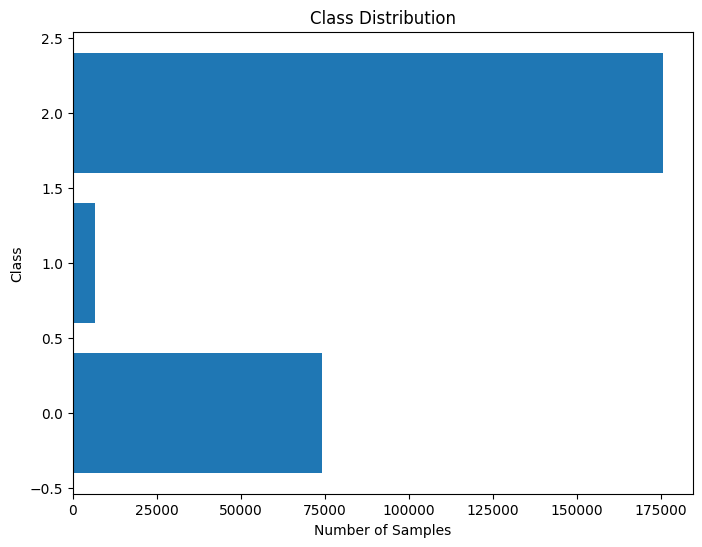

In [144]:
fake_data = fake_df.values
# split into input and output elements
X, y = fake_data[:, :-1], fake_data[:, -1]
y = LabelEncoder().fit_transform(y)

for k,v in Counter(y).items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Plot the distribution as a horizontal bar chart with axis labels and a title
class_distribution = Counter(y)
fig, ax = pyplot.subplots(figsize=(8, 6))
ax.barh(list(class_distribution.keys()), class_distribution.values(), align='center')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Class')
ax.set_title('Class Distribution')
pyplot.show()


In [145]:
fake_df.isna()

,id,tid1,tid2,title1_en,title2_en,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
256437,False,False,False,False,False,False
256438,False,False,False,False,False,False
256439,False,False,False,False,False,False
256440,False,False,False,False,False,False


In [146]:
fake_test_df.isna()

,id,tid1,tid2,title1_en,title2_en
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64105,False,False,False,False,False
64106,False,False,False,False,False
64107,False,False,False,False,False
64108,False,False,False,False,False


In [147]:
fake_df.notnull()

,id,tid1,tid2,title1_en,title2_en,label
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
256437,True,True,True,True,True,True
256438,True,True,True,True,True,True
256439,True,True,True,True,True,True
256440,True,True,True,True,True,True


In [148]:
fake_test_df.notnull()

,id,tid1,tid2,title1_en,title2_en
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
64105,True,True,True,True,True
64106,True,True,True,True,True
64107,True,True,True,True,True
64108,True,True,True,True,True


In [149]:
#converting strings to lowercase
fake_test_df["title1_en"] = fake_test_df["title1_en"].apply(lambda x: x.lower())
fake_test_df["title2_en"] = fake_test_df["title2_en"].apply(lambda x: x.lower())
print(fake_test_df["title1_en"])

0        the great coat brother zhu zhu wen, in the man...
1        nasa reveals facts about ufo wreckage found on...
2            the hollow tomatoes are loaded with hormones.
3        ange pavilion geoshui: how accurate is matrimo...
4        a 50-year-old bus-bus blows up an 8-year-old c...
                               ...                        
64105    the lead content of domestic faucet exceeds th...
64106    in 2018, the household registration system has...
64107    onion can not be eaten with this, serious also...
64108    grass-root teacher salaries, the last increase...
64109    li weijia weeping, crying, drugs? sick? see ho...
Name: title1_en, Length: 64110, dtype: object


In [150]:
#converting strings to lowercase for test data set
fake_test_df["title1_en"] = fake_test_df["title1_en"].apply(lambda x: x.lower())
fake_test_df["title2_en"] = fake_test_df["title2_en"].apply(lambda x: x.lower())
print(fake_test_df["title1_en"])

0        the great coat brother zhu zhu wen, in the man...
1        nasa reveals facts about ufo wreckage found on...
2            the hollow tomatoes are loaded with hormones.
3        ange pavilion geoshui: how accurate is matrimo...
4        a 50-year-old bus-bus blows up an 8-year-old c...
                               ...                        
64105    the lead content of domestic faucet exceeds th...
64106    in 2018, the household registration system has...
64107    onion can not be eaten with this, serious also...
64108    grass-root teacher salaries, the last increase...
64109    li weijia weeping, crying, drugs? sick? see ho...
Name: title1_en, Length: 64110, dtype: object


In [151]:
print(fake_test_df["title2_en"])

0        lin xinsheng after the birth of "hard milking,...
1        the ufo found in yuancun, jiaocheng county, sh...
2        li chenfan bingbing home photos, netizen: this...
3        master one: the eight-character presumption of...
4        < i > joe johnson's disgruntled timing and ord...
                               ...                        
64105    the multi-brand faucet is overtaxed, who is en...
64106    in 2018, the household registration system wil...
64107    onion can not eat with this, serious also can ...
64108    teachers wage reform, there will be these thre...
64109    li weijia on the hot air, netizens: li weijia ...
Name: title2_en, Length: 64110, dtype: object


In [152]:
#stopwords removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)
fake_df["title1_en"] = fake_df["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
fake_df["title2_en"] = fake_df["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(fake_df[["title1_en", "title2_en"]])

{'again', 'below', 'shouldn', 'herself', 'don', 'were', 'been', 'haven', "you've", "it's", 'wouldn', 'before', 'being', 'he', 'but', 'who', 'here', 'hasn', "wasn't", "she's", 'between', 'me', 'my', 'yourself', 'from', 'than', "should've", 'theirs', 'himself', "don't", 'hadn', 'did', 'this', 'through', 'you', 'over', 'just', 'm', 'hers', 'ain', 'myself', 'be', 'ours', 'for', "couldn't", "hasn't", "you're", 'during', 'can', 'had', 'some', 'is', 'further', "that'll", 'those', 'have', 've', 'i', 'once', 'these', 'few', "you'll", 're', 'mustn', 'very', 'they', 'them', 't', 'in', 'own', 'his', 'then', "shouldn't", 'all', 'her', 'shan', 'only', 'aren', 'against', 'where', "didn't", 'isn', 'on', 'of', 'we', 'down', 'how', 'should', 'was', 'same', "hadn't", 'needn', 'has', "wouldn't", 'any', 'ourselves', 'a', 'and', 'off', 'am', 'out', 'to', 'as', 'or', 'their', 'it', "weren't", "won't", 'with', 'into', 'themselves', 'does', 'd', 'him', 'she', 'under', 'more', 'because', 'no', 'an', 'itself', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                title1_en  \
0       There two new old-age insurance benefits old p...   
1       "If come Shenzhen, sooner later son also come....   
2       "If come Shenzhen, sooner later son also come....   
3       "If come Shenzhen, sooner later son also come....   
4       "If come Shenzhen, sooner later son also come....   
...                                                   ...   
256437  egypt 's presidential election failed win mill...   
256438  egypt 's presidential election failed win mill...   
256439  egypt 's presidential election failed win mill...   
256440  egypt 's presidential election failed win mill...   
256441  Will United States wage war Iraq without destr...   

                                                title2_en  
0       Police disprove "bird's nest congress person g...  
1       Shenzhen's GDP outstrips Hong Kong? Shenzhen S...  
2       The GDP overtopped Hong Kong? Shenzhen clarifi...  
3       Shenzhen's GDP over

In [153]:
#stopwords removal for test dataset
fake_test_df["title1_en"] = fake_test_df["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
fake_test_df["title2_en"] = fake_test_df["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(fake_test_df[["title1_en", "title2_en"]])

                                               title1_en  \
0      great coat brother zhu zhu wen, mandarin love ...   
1            nasa reveals facts ufo wreckage found moon.   
2                       hollow tomatoes loaded hormones.   
3      ange pavilion geoshui: accurate matrimony matc...   
4      50-year-old bus-bus blows 8-year-old child. ru...   
...                                                  ...   
64105  lead content domestic faucet exceeds standard ...   
64106  2018, household registration system changed, 3...   
64107  onion eaten this, serious also cause eye blind...   
64108  grass-root teacher salaries, last increase end...   
64109  li weijia weeping, crying, drugs? sick? see re...   

                                               title2_en  
0      lin xinsheng birth "hard milking," huo jianhua...  
1      ufo found yuancun, jiaocheng county, shanxi, s...  
2      li chenfan bingbing home photos, netizen: call...  
3      master one: eight-character presumpt

In [154]:
#punctuation removal
import string
string.punctuation
fake_df["title1_en"] = fake_df["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
fake_df["title2_en"] = fake_df["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(fake_df[["title1_en", "title2_en"]])

                                                title1_en  \
0       There two new oldage insurance benefits old pe...   
1       If come Shenzhen sooner later son also come In...   
2       If come Shenzhen sooner later son also come In...   
3       If come Shenzhen sooner later son also come In...   
4       If come Shenzhen sooner later son also come In...   
...                                                   ...   
256437  egypt s presidential election failed win milli...   
256438  egypt s presidential election failed win milli...   
256439  egypt s presidential election failed win milli...   
256440  egypt s presidential election failed win milli...   
256441  Will United States wage war Iraq without destr...   

                                                title2_en  
0       Police disprove birds nest congress person get...  
1       Shenzhens GDP outstrips Hong Kong Shenzhen Sta...  
2       The GDP overtopped Hong Kong Shenzhen clarifie...  
3       Shenzhens GDP overt

In [155]:
#punctuation removal for test dataset
fake_test_df["title1_en"] = fake_test_df["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
fake_test_df["title2_en"] = fake_test_df["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(fake_test_df[["title1_en", "title2_en"]])

                                               title1_en  \
0      great coat brother zhu zhu wen mandarin love s...   
1             nasa reveals facts ufo wreckage found moon   
2                        hollow tomatoes loaded hormones   
3      ange pavilion geoshui accurate matrimony match...   
4      50yearold busbus blows 8yearold child rumors r...   
...                                                  ...   
64105  lead content domestic faucet exceeds standard ...   
64106  2018 household registration system changed 3 t...   
64107  onion eaten this serious also cause eye blindn...   
64108  grassroot teacher salaries last increase end y...   
64109   li weijia weeping crying drugs sick see responds   

                                               title2_en  
0      lin xinsheng birth hard milking huo jianhua se...  
1      ufo found yuancun jiaocheng county shanxi shoc...  
2      li chenfan bingbing home photos netizen called...  
3      master one eightcharacter presumptio

In [156]:
#lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

fake_df["title1_en"] = fake_df["title1_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))
fake_df["title2_en"] = fake_df["title2_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [157]:
print(fake_df[["title1_en", "title2_en"]])

                                                title1_en  \
0       There two new oldage insurance benefit old peo...   
1       If come Shenzhen sooner later son also come In...   
2       If come Shenzhen sooner later son also come In...   
3       If come Shenzhen sooner later son also come In...   
4       If come Shenzhen sooner later son also come In...   
...                                                   ...   
256437  egypt s presidential election failed win milli...   
256438  egypt s presidential election failed win milli...   
256439  egypt s presidential election failed win milli...   
256440  egypt s presidential election failed win milli...   
256441  Will United States wage war Iraq without destr...   

                                                title2_en  
0       Police disprove bird nest congress person get ...  
1       Shenzhens GDP outstrips Hong Kong Shenzhen Sta...  
2       The GDP overtopped Hong Kong Shenzhen clarifie...  
3       Shenzhens GDP overt

In [158]:
#applying lemmatization to test data
fake_test_df["title1_en"] = fake_test_df["title1_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))
fake_test_df["title2_en"] = fake_test_df["title2_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))


In [159]:
print(fake_test_df[["title1_en", "title2_en"]])

                                               title1_en  \
0      great coat brother zhu zhu wen mandarin love s...   
1              nasa reveals fact ufo wreckage found moon   
2                           hollow tomato loaded hormone   
3      ange pavilion geoshui accurate matrimony match...   
4      50yearold busbus blow 8yearold child rumor rum...   
...                                                  ...   
64105  lead content domestic faucet exceeds standard ...   
64106  2018 household registration system changed 3 t...   
64107  onion eaten this serious also cause eye blindn...   
64108  grassroot teacher salary last increase end yea...   
64109       li weijia weeping cry drug sick see responds   

                                               title2_en  
0      lin xinsheng birth hard milking huo jianhua se...  
1      ufo found yuancun jiaocheng county shanxi shoc...  
2      li chenfan bingbing home photo netizen called ...  
3      master one eightcharacter presumptio

In [160]:
#combining title 1 and title 2
fake_df["com_title"] = fake_df["title1_en"] + fake_df["title2_en"]
print(fake_df["com_title"])

0         There two new oldage insurance benefit old peo...
1         If come Shenzhen sooner later son also come In...
2         If come Shenzhen sooner later son also come In...
3         If come Shenzhen sooner later son also come In...
4         If come Shenzhen sooner later son also come In...
                                ...                        
256437    egypt s presidential election failed win milli...
256438    egypt s presidential election failed win milli...
256439    egypt s presidential election failed win milli...
256440    egypt s presidential election failed win milli...
256441    Will United States wage war Iraq without destr...
Name: com_title, Length: 256442, dtype: object


In [161]:
#combining title 1 and title 2 for test dataset
fake_test_df["com_title"] = fake_test_df["title1_en"] + fake_test_df["title2_en"]
print(fake_test_df["com_title"])

0        great coat brother zhu zhu wen mandarin love s...
1        nasa reveals fact ufo wreckage found moonufo f...
2        hollow tomato loaded hormoneli chenfan bingbin...
3        ange pavilion geoshui accurate matrimony match...
4        50yearold busbus blow 8yearold child rumor rum...
                               ...                        
64105    lead content domestic faucet exceeds standard ...
64106    2018 household registration system changed 3 t...
64107    onion eaten this serious also cause eye blindn...
64108    grassroot teacher salary last increase end yea...
64109    li weijia weeping cry drug sick see respondsli...
Name: com_title, Length: 64110, dtype: object


In [162]:
print(fake_df["label"])

0         unrelated
1         unrelated
2         unrelated
3         unrelated
4         unrelated
            ...    
256437    unrelated
256438    unrelated
256439    unrelated
256440    unrelated
256441    unrelated
Name: label, Length: 256442, dtype: object


In [163]:
one_hot_fake_df = pd.get_dummies(fake_df, columns = ['label'])

In [164]:
one_hot_fake_df

,id,tid1,tid2,title1_en,title2_en,com_title,label_agreed,label_disagreed,label_unrelated
0,195611,0,1,There two new oldage insurance benefit old peo...,Police disprove bird nest congress person get ...,There two new oldage insurance benefit old peo...,0,0,1
1,191474,2,3,If come Shenzhen sooner later son also come In...,Shenzhens GDP outstrips Hong Kong Shenzhen Sta...,If come Shenzhen sooner later son also come In...,0,0,1
2,25300,2,4,If come Shenzhen sooner later son also come In...,The GDP overtopped Hong Kong Shenzhen clarifie...,If come Shenzhen sooner later son also come In...,0,0,1
3,123757,2,8,If come Shenzhen sooner later son also come In...,Shenzhens GDP overtakes Hong Kong Bureau Stati...,If come Shenzhen sooner later son also come In...,0,0,1
4,141761,2,11,If come Shenzhen sooner later son also come In...,Shenzhens GDP outpaces Hong Kong Defending Rum...,If come Shenzhen sooner later son also come In...,0,0,1
...,...,...,...,...,...,...,...,...,...
256437,113364,167562,48447,egypt s presidential election failed win milli...,Salah retiring Football Association official l...,egypt s presidential election failed win milli...,0,0,1
256438,49407,167562,49795,egypt s presidential election failed win milli...,Liverpools bid Little Germany The Echos discla...,egypt s presidential election failed win milli...,0,0,1
256439,130134,167562,114783,egypt s presidential election failed win milli...,West Media Exposing Tallahlach recommended Bar...,egypt s presidential election failed win milli...,0,0,1
256440,101494,167562,137705,egypt s presidential election failed win milli...,Rumor Egypt united difference u,egypt s presidential election failed win milli...,0,0,1


In [165]:
#splitting dataset into training and validation set
xTrain, xVal1, yTrain, yVal1 = train_test_split(one_hot_fake_df[["com_title"]], one_hot_fake_df[["label_agreed", "label_disagreed", "label_unrelated"]], test_size = 0.3, shuffle = True)

In [166]:
yTrain

,label_agreed,label_disagreed,label_unrelated
243678,0,0,1
123393,0,0,1
86897,0,0,1
49811,0,0,1
66962,1,0,0
...,...,...,...
200119,0,0,1
133953,0,0,1
75877,0,0,1
204889,0,0,1


In [167]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
xTrain.shape

(179509, 1)

In [169]:
countVect = CountVectorizer()
x_train1_counts = countVect.fit_transform(xTrain.iloc[:,0])
x_train1_counts.shape

(179509, 147975)

In [170]:
x_train1_counts

<179509x147975 sparse matrix of type '<class 'numpy.int64'>'
	with 3191755 stored elements in Compressed Sparse Row format>

In [171]:
countVect.vocabulary_.get(u'algorithm')

7502

In [172]:
#tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tf_id_df1 = TfidfTransformer()
xTrain1_tf_id_df = tf_id_df1.fit_transform(x_train1_counts)

xTrain1_tf_id_df.shape

(179509, 147975)

In [173]:
yTrain

,label_agreed,label_disagreed,label_unrelated
243678,0,0,1
123393,0,0,1
86897,0,0,1
49811,0,0,1
66962,1,0,0
...,...,...,...
200119,0,0,1
133953,0,0,1
75877,0,0,1
204889,0,0,1


In [174]:
yTrain = yTrain.apply(lambda x: x.argmax(), axis=1).values

In [175]:
yTrain

array([2, 2, 2, ..., 2, 2, 2])

In [176]:
#label 0 - agreed
#label 1 - disagreed
#label 2 - unrelated
#Training a naive bayes classifier on training dataset
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB().fit(xTrain1_tf_id_df, yTrain)
print(xVal1)

                                                com_title
107219  Eat three kind fruit frequently eat lower chol...
226631  Wang Jianlin inner speech exposure 2018 profit...
127542  Make sure make referral community hospital go ...
252992  Toxicity tip tongue Talygornia catapula Bracke...
85550   Rural housing reconstruction planning 2018 per...
...                                                   ...
142056  Police Someone pretending famous doctor steal ...
78144   Institution reform new regulation people raise...
70752   China Sky Eye top world US foreign medium say ...
7182    The mobile point 2017 going wiped out Those al...
214224  Failure draw pension per month affect annual i...

[76933 rows x 1 columns]


In [177]:
x_val1_counts = countVect.transform(xVal1.iloc[:,0])
x_val1_tfidf = tf_id_df1.transform(x_val1_counts)
pred = nb1.predict(x_val1_tfidf)
print(x_val1_counts.shape)
print(pred)

(76933, 147975)
[2 0 2 ... 2 2 2]


In [178]:
yVal1 = yVal1.apply(lambda x: x.argmax(), axis=1).values

In [179]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accu_score1 = accuracy_score(yVal1, pred)
accu_score1

0.7323775232994943

In [180]:
#confusion matrix
from sklearn import metrics

metrics.confusion_matrix(yVal1, pred)

array([[ 4462,     0, 17794],
       [    3,    12,  2054],
       [  738,     0, 51870]])

In [181]:
print(metrics.classification_report(list(yVal1), list(pred)))

              precision    recall  f1-score   support

           0       0.86      0.20      0.32     22256
           1       1.00      0.01      0.01      2069
           2       0.72      0.99      0.83     52608

    accuracy                           0.73     76933
   macro avg       0.86      0.40      0.39     76933
weighted avg       0.77      0.73      0.66     76933



In [182]:
from sklearn.model_selection import cross_val_score

accu = cross_val_score(nb1, xTrain1_tf_id_df, yTrain.ravel(), scoring = 'accuracy', cv = 5)
accu

array([0.72366442, 0.72221603, 0.72280096, 0.72452788, 0.7234896 ])

In [183]:
from sklearn.linear_model import SGDClassifier
svm1 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(xTrain1_tf_id_df, yTrain.ravel())

In [184]:
#predicting using SGD model for dataset 
predict2 = svm1.predict(x_val1_tfidf)
print(predict2)

[2 2 2 ... 2 2 2]


In [185]:
accu_score2 = accuracy_score(yVal1, predict2)
accu_score2

0.6838157877633785

In [186]:
#confusion matrix

metrics.confusion_matrix(yVal1, predict2)

array([[    0,     0, 22256],
       [    0,     0,  2069],
       [    0,     0, 52608]])

In [187]:
print(metrics.classification_report(list(yVal1), list(predict2)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22256
           1       0.00      0.00      0.00      2069
           2       0.68      1.00      0.81     52608

    accuracy                           0.68     76933
   macro avg       0.23      0.33      0.27     76933
weighted avg       0.47      0.68      0.56     76933



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
from sklearn.model_selection import cross_val_score
#accu2 = cross_val_score(svm, x_val_tfidf, y_val.ravel(), scoring = 'accuracy', cv = 5)
accu2 = cross_val_score(svm1, xTrain1_tf_id_df, yTrain.ravel(), scoring = 'accuracy', cv = 5)
accu2

array([0.68514289, 0.68514289, 0.68514289, 0.68514289, 0.68516197])

In [189]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(x_train_tfidf, y_train)
lr1 = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(xTrain1_tf_id_df, yTrain.ravel())
#predicting using SVM model for dataset 
predict3 = lr1.predict(x_val1_tfidf)
print(predict3)

[LibLinear][2 0 2 ... 2 2 2]


In [190]:
accu_score3 = accuracy_score(yVal1, predict3)
accu_score3

0.8081837442969857

In [191]:
metrics.confusion_matrix(yVal1, predict3)

array([[13998,    23,  8235],
       [   66,   425,  1578],
       [ 4775,    80, 47753]])

In [192]:
print(metrics.classification_report(list(yVal1), list(predict3)))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68     22256
           1       0.80      0.21      0.33      2069
           2       0.83      0.91      0.87     52608

    accuracy                           0.81     76933
   macro avg       0.79      0.58      0.63     76933
weighted avg       0.80      0.81      0.80     76933



In [193]:
from sklearn.model_selection import cross_val_score
accu3 = cross_val_score(lr1, xTrain1_tf_id_df, yTrain.ravel(), scoring = 'accuracy', cv = 5)
accu3

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

array([0.80260153, 0.80098602, 0.80349284, 0.79981617, 0.80379377])

In [194]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth = 2, random_state = 0).fit(xTrain1_tf_id_df, yTrain.ravel())
predict4 = rf1.predict(x_val1_tfidf)
print(predict4)

[2 2 2 ... 2 2 2]


In [195]:
metrics.confusion_matrix(yVal1, predict4)

array([[    0,     0, 22256],
       [    0,     0,  2069],
       [    0,     0, 52608]])

In [196]:
accu_score4 = accuracy_score(yVal1, predict4)
accu_score4

0.6838157877633785

In [197]:
print(metrics.classification_report(list(yVal1), list(predict4)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22256
           1       0.00      0.00      0.00      2069
           2       0.68      1.00      0.81     52608

    accuracy                           0.68     76933
   macro avg       0.23      0.33      0.27     76933
weighted avg       0.47      0.68      0.56     76933



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
accu4 = cross_val_score(rf1, xTrain1_tf_id_df, yTrain.ravel(), scoring = 'accuracy', cv = 5)
accu4

array([0.68514289, 0.68514289, 0.68514289, 0.68514289, 0.68516197])

In [199]:
#Support Vector Classifier
from sklearn.svm import LinearSVC
svc1 = LinearSVC(random_state = 0).fit(xTrain1_tf_id_df, yTrain.ravel())
predict5 = svc1.predict(x_val1_tfidf)
print(predict5)

[2 0 2 ... 2 2 2]


In [200]:
accu_score5 = accuracy_score(yVal1, predict5)
accu_score5

0.8150858539248437

In [201]:
accu5 = cross_val_score(svc1, xTrain1_tf_id_df, yTrain.ravel(), scoring = 'accuracy', cv = 5)
accu5

array([0.80892429, 0.80689098, 0.80806083, 0.80499694, 0.80819476])

In [202]:
metrics.confusion_matrix(yVal1, predict5)

array([[14625,    29,  7602],
       [   69,   523,  1477],
       [ 4922,   127, 47559]])

In [203]:
print(metrics.classification_report(list(yVal1), list(predict5)))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70     22256
           1       0.77      0.25      0.38      2069
           2       0.84      0.90      0.87     52608

    accuracy                           0.82     76933
   macro avg       0.79      0.60      0.65     76933
weighted avg       0.81      0.82      0.81     76933



In [204]:
count_vect2 = CountVectorizer()
x_counts_train2 = count_vect2.fit_transform(one_hot_fake_df[["com_title"]].iloc[:,0])
x_counts_train2.shape

(256442, 182871)

In [205]:
x_counts_train2

<256442x182871 sparse matrix of type '<class 'numpy.int64'>'
	with 4560529 stored elements in Compressed Sparse Row format>

In [206]:
count_vect2.vocabulary_.get(u'algorithm')


9131

In [207]:

yTrain2 = one_hot_fake_df[["label_agreed", "label_disagreed", "label_unrelated"]].apply(lambda x: x.argmax(), axis=1).values

In [208]:
yTrain2

array([2, 2, 2, ..., 2, 2, 2])

Class=2, n=175598 (33.333%)
Class=0, n=175598 (33.333%)
Class=1, n=175598 (33.333%)


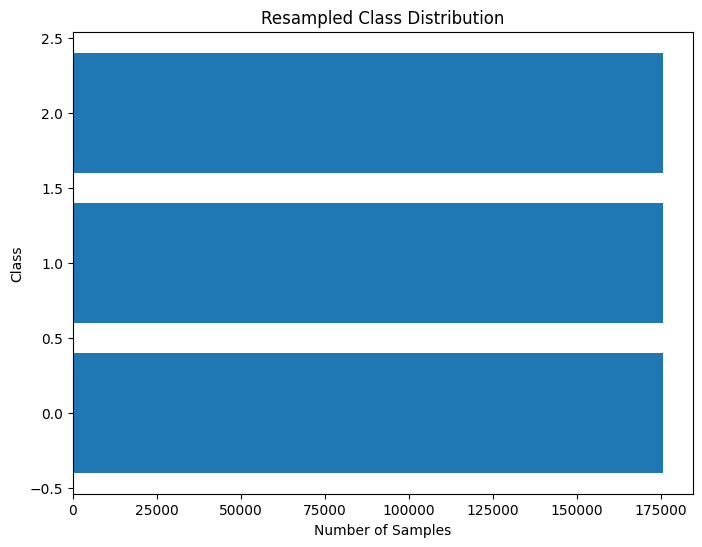

In [209]:
#data augmentation - oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(x_counts_train2, yTrain2)

for k,v in Counter(y_resampled).items():
	per = v / len(y_resampled) * 100
#	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# Plot the distribution as a horizontal bar chart with axis labels and a title
class_distribution = Counter(y_resampled)
fig, ax = pyplot.subplots(figsize=(8, 6))
ax.barh(list(class_distribution.keys()), class_distribution.values(), align='center')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Class')
ax.set_title('Resampled Class Distribution')
pyplot.show()


In [210]:
count_vect2.vocabulary_.get(u'algorithm')


9131

In [211]:
xTrain2 = X_resampled
yTrain2 = y_resampled


In [212]:
#splitting dataset into training and validation set
xTrain2, xValue2, yTrain2, yValue2 = train_test_split(xTrain2, yTrain2, test_size = 0.3, shuffle = True)

In [213]:
#tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

td_id_df2 = TfidfTransformer()
xTrain2_td_id_df = td_id_df2.fit_transform(xTrain2)

xTrain2_td_id_df.shape

(368755, 182871)

In [214]:
#Training a naive bayes classifier on training dataset
from sklearn.naive_bayes import MultinomialNB

nb2 = MultinomialNB().fit(xTrain2_td_id_df, yTrain2.ravel())


In [215]:
#x_val_counts = count_vect.transform(x_val.iloc[:,0])
xValue2_td_id_df = td_id_df2.transform(xValue2)
dPredict = nb2.predict(xValue2_td_id_df)
print(xValue2.shape)
print(dPredict)

(158039, 182871)
[0 1 0 ... 0 2 0]


In [216]:
#calculate accuracy
from sklearn.metrics import accuracy_score
daccu_score1 = accuracy_score(yValue2, dPredict)
daccu_score1

0.7749669385404868

In [217]:
#confusion matrix
from sklearn import metrics

metrics.confusion_matrix(yValue2, dPredict)

array([[43213,  2128,  7132],
       [ 4272, 44757,  3749],
       [14855,  3428, 34505]])

In [218]:
print(metrics.classification_report(list(yValue2), list(dPredict)))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     52473
           1       0.89      0.85      0.87     52778
           2       0.76      0.65      0.70     52788

    accuracy                           0.77    158039
   macro avg       0.78      0.78      0.77    158039
weighted avg       0.78      0.77      0.77    158039



In [219]:
dPredict

array([0, 1, 0, ..., 0, 2, 0])

In [220]:
from sklearn.model_selection import cross_val_score

daccuracy1 = cross_val_score(nb2, xTrain2_td_id_df, yTrain2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy1

array([0.76992854, 0.77002346, 0.77154208, 0.7705387 , 0.76769129])

In [221]:
from sklearn.linear_model import SGDClassifier


svm2 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(xTrain2_td_id_df, yTrain2.ravel())

In [222]:
#predicting using SVM model for dataset 
dPredict2 = svm2.predict(xValue2_td_id_df)
print(dPredict2)

[1 1 0 ... 1 0 0]


In [223]:
daccu_score2 = accuracy_score(yValue2, dPredict2)
daccu_score2

0.6348812634855954

In [224]:
#confusion matrix

metrics.confusion_matrix(yValue2, dPredict2)

array([[41097,  8400,  2976],
       [ 2402, 49516,   860],
       [24147, 18918,  9723]])

In [225]:
print(metrics.classification_report(list(yValue2), list(dPredict2)))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68     52473
           1       0.64      0.94      0.76     52778
           2       0.72      0.18      0.29     52788

    accuracy                           0.63    158039
   macro avg       0.66      0.64      0.58    158039
weighted avg       0.66      0.63      0.58    158039



In [226]:
from sklearn.model_selection import cross_val_score
accu2 = cross_val_score(svm2, xTrain2_td_id_df, yTrain2.ravel(), scoring = 'accuracy', cv = 5)
accu2

array([0.63679137, 0.63479817, 0.63802525, 0.63596426, 0.63668289])

In [227]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(xTrain2_td_id_df, yTrain2.ravel())
#predicting using SVM model for dataset 
dPredict3 = lr2.predict(xValue2_td_id_df)
print(dPredict3)

[LibLinear][1 1 0 ... 1 2 0]


In [228]:
daccu_score3 = accuracy_score(yValue2, dPredict3)
daccu_score3

0.8622365365511044

In [229]:
metrics.confusion_matrix(yValue2, dPredict3)

array([[44165,  2334,  5974],
       [  931, 51042,   805],
       [ 9271,  2457, 41060]])

In [230]:
print(metrics.classification_report(list(yValue2), list(dPredict3)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     52473
           1       0.91      0.97      0.94     52778
           2       0.86      0.78      0.82     52788

    accuracy                           0.86    158039
   macro avg       0.86      0.86      0.86    158039
weighted avg       0.86      0.86      0.86    158039



In [231]:
from sklearn.model_selection import cross_val_score
daccuracy3 = cross_val_score(lr2, xTrain2_td_id_df, yTrain2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy3

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

array([0.8564494 , 0.85707312, 0.85738498, 0.85823921, 0.85701889])

In [232]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth = 2, random_state = 0).fit(xTrain2_td_id_df, yTrain2.ravel())
dPredict4 = rf2.predict(xValue2_td_id_df)
print(dPredict4)

[0 0 0 ... 0 0 0]


In [233]:
metrics.confusion_matrix(yValue2, dPredict4)

array([[40630,  2639,  9204],
       [20904, 28818,  3056],
       [31675,  4213, 16900]])

In [234]:
daccu_score4 = accuracy_score(yValue2, dPredict4)
daccu_score4

0.5463714652712305

In [235]:
print(metrics.classification_report(list(yValue2), list(dPredict4)))

              precision    recall  f1-score   support

           0       0.44      0.77      0.56     52473
           1       0.81      0.55      0.65     52778
           2       0.58      0.32      0.41     52788

    accuracy                           0.55    158039
   macro avg       0.61      0.55      0.54    158039
weighted avg       0.61      0.55      0.54    158039



In [236]:
daccuracy4 = cross_val_score(rf2, xTrain2_td_id_df, yTrain2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy4

array([0.52152513, 0.5431384 , 0.50906428, 0.51860992, 0.54023674])

In [237]:
#Support Vector Classifier
from sklearn.svm import LinearSVC
svc2 = LinearSVC(random_state = 0).fit(xTrain2_td_id_df, yTrain2)
dPredict5 = svc2.predict(xValue2_td_id_df)
print(dPredict5)

[1 1 0 ... 1 2 0]


In [238]:
daccu_score5 = accuracy_score(yValue2, dPredict5)
daccu_score5

0.8692601193376318

In [239]:
daccuracy5 = cross_val_score(svc2, xTrain2_td_id_df, yTrain2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy5

array([0.86336456, 0.86394761, 0.86396117, 0.8644493 , 0.86425947])

In [240]:
metrics.confusion_matrix(yValue2, dPredict5)

array([[44726,  2378,  5369],
       [  712, 51379,   687],
       [ 9237,  2279, 41272]])

In [241]:
print(metrics.classification_report(list(yValue2), list(dPredict5)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     52473
           1       0.92      0.97      0.94     52778
           2       0.87      0.78      0.82     52788

    accuracy                           0.87    158039
   macro avg       0.87      0.87      0.87    158039
weighted avg       0.87      0.87      0.87    158039



In [242]:
x_test = fake_test_df["com_title"]
x_test

0        great coat brother zhu zhu wen mandarin love s...
1        nasa reveals fact ufo wreckage found moonufo f...
2        hollow tomato loaded hormoneli chenfan bingbin...
3        ange pavilion geoshui accurate matrimony match...
4        50yearold busbus blow 8yearold child rumor rum...
                               ...                        
64105    lead content domestic faucet exceeds standard ...
64106    2018 household registration system changed 3 t...
64107    onion eaten this serious also cause eye blindn...
64108    grassroot teacher salary last increase end yea...
64109    li weijia weeping cry drug sick see respondsli...
Name: com_title, Length: 64110, dtype: object

In [243]:
x_test_counts = count_vect2.transform(fake_test_df[["com_title"]].iloc[:,0])
xTestTfi_df = td_id_df2.transform(x_test_counts)
tPredict = svc2.predict(xTestTfi_df)
print(x_test_counts.shape)
print(tPredict)

(64110, 182871)
[2 0 2 ... 0 2 0]


In [244]:
type(tPredict)


numpy.ndarray

In [245]:
len(tPredict)

64110

In [246]:
#write to output file
tPredict2 = [None] * 64110
for i in range(len(tPredict)):
  if tPredict[i] == 0:
    tPredict2[i] = 'agreed'
  elif tPredict[i] == 1:
    tPredict2[i] = 'disagreed'
  else:
    tPredict2[i] = 'unrelated'
tPredict2

['unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'agreed',
 'agreed',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'disagreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'u

In [247]:
tPredict2[0]

'unrelated'

In [248]:
tPredict[1]

0

In [249]:
import csv
list_1 = fake_test_df['id'].tolist()
list_1.insert(0, 'id')
list_2 = tPredict2
list_2.insert(0, 'label')
with open('submission.csv', 'w') as f:
  writer = csv.writer(f, delimiter='\t')
  writer.writerows(zip(list_1,list_2))

In [250]:
tPredict2[0]

'label'